# 라이브러리

In [1]:
print(" - Made by LeeMunKyu")
"""base_module"""
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
"""visualization"""
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)
import seaborn as sns
"""preprocessing"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
"""machinelearning_algorithm"""
from catboost import CatBoostRegressor
"""scoring"""
from sklearn.metrics import mean_squared_error,mean_absolute_error
"""etc"""
import warnings
warnings.filterwarnings("ignore")

 - Made by LeeMunKyu


# 데이터 로드

In [2]:
data = pd.read_csv("../data/train-data.csv")
data.reset_index(drop=True)
del data["ID"]

테스트 = pd.read_csv("../data/test-data.csv")
테스트.reset_index(drop=True)
del 테스트["ID"]

price = data["Price"]
total = pd.concat([data,테스트])
total.reset_index(drop=True,inplace=True)
del total["Price"]

In [3]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018 entries, 0 to 6017
Data columns (total 11 columns):
Engine               5896 non-null object
Fuel_Type            5726 non-null object
Kilometers_Driven    5172 non-null float64
Location             5924 non-null object
Mileage              5958 non-null object
Name                 6018 non-null object
Owner_Type           5753 non-null object
Power                5154 non-null object
Seats                5942 non-null float64
Transmission         6018 non-null object
Year                 5661 non-null float64
dtypes: float64(3), object(8)
memory usage: 517.3+ KB


# 0. 예슬's Preprocessing

# 0-1. 엔진분류

In [4]:
for i in range(len(total)) :
        if(pd.isnull(total["Fuel_Type"][i])):
            ###디젤 엔진
                if 'TDI' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'
                if 'CDRi' in total['Name'][i].split(" ") or 'CDRI' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'
                if 'CDI' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'
                if 'VGT' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'
                if 'GD' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'
                if 'HSE' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'
                if 'Quadrajet' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'
                if 'Quattro' in total['Name'][i].split(" ") or 'quattro' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel' 
                if 'ZDI' in total['Name'][i].split(" ") or 'ZDi' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel' 
                if 'VDI' in total['Name'][i].split(" ") or 'VDi' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'  
                if 'LDI' in total['Name'][i].split(" ") or 'LDi' in total['Name'][i].split(" ") or 'Ldi' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Diesel'  

            ###가솔린(petrol) 
                if 'Petrol' in total['Name'][i].split(" ") or '(Petrol)' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'TFSI' in total['Name'][i].split(" ") or 'FSI' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'GDI' in total['Name'][i].split(" ") or 'GDi' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'LXI' in total['Name'][i].split(" ") or 'LXi' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'D-4D' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'CGI' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'TSI' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'MPI' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'i-Vtech' in total['Name'][i].split(" ") or 'VTEC' in total['Name'][i].split(" ") or 'i-VTEC' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'
                if 'VXI' in total['Name'][i].split(" ") or 'VXi' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'Petrol'

            ###천연(CNG)
                if 'CNG' in total['Name'][i].split(" ") or '(CNG)' in total['Name'][i].split(" ") :
                    total['Fuel_Type'][i] = 'CNG'
            ###LPG
                if 'LPG' in total['Name'][i].split(" ") or '(LPG)' in total['Name'][i].split(" "):
                    total['Fuel_Type'][i] = 'LPG'
        else : pass


# 0-2 . 차종 분류

In [5]:
total['cartype']= 'null'

for i in range(len(total)) :
        if 'Sedan' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Sport' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Wagon' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Wagon'
        if 'Hatchback' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Coupe' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Coupe'
        if 'Convertible' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Convertible'
        #### 기본 분류
        if 'Sportz' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'               ####스포티지 : 준중형 suv
        if '7-seater' in total['Name'][i].split(" ") or '8-seater' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'  
 ###############################################################################################  브랜드별 분류         
        if 'X1' in total['Name'][i].split(" ") or 'X3' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if '1' in total['Name'][i].split(" ") and 'Series' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'     
        if '3' in total['Name'][i].split(" ") and 'Series' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan' 
        if '5' in total['Name'][i].split(" ") and 'Series' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if '7' in total['Name'][i].split(" ") and 'Series' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'X5' in total['Name'][i].split(" ") or 'X6' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Z4' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Convertible'
            
            #### BMW
            #### 1 Series : 해치백
            #### 3 Series : Sedan, 중형 , 
            #### 5 Series : 준대형 (Sedan 추정) , X5, X6 : 준대형 SUV
            #### 7 Series : 대형 Sedan
            #### X1 : 준중형 suv, X3 : 중형 suv ,  
            #### Z4 : Convertible
            
        if 'GLC' in total['Name'][i].split(" ") or 'GLA' in total['Name'][i].split(" ") or 'GLE' in total['Name'][i].split(" ") \
        or 'GLS' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV' 
        if 'M-Class' in total['Name'][i].split(" ") or 'GL-Class' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if  'A' in total['Name'][i].split(" ") or 'S' in total['Name'][i].split(" ") and 'Class' in total['Name'][i].split(" "):
            total['cartype'][i] = 'Sedan'
        if  'B' in total['Name'][i].split(" ") or 'C' in total['Name'][i].split(" ") and 'Class' in total['Name'][i].split(" "):
            total['cartype'][i] = 'Sedan'
        if 'E-Class' in total['Name'][i].split(" ") or 'C-Class' in total['Name'][i].split(" ") or 'S-Class' in total['Name'][i].split(" ") or 'CLS-Class' in total['Name'][i].split(" ") or 'CLA' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'SLK-Class' in total['Name'][i].split(" ") or 'SL-Class' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Coupe'
        if 'R-Class' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
        if 'SLC' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Convertible'
            
            #### 메르세데스-벤츠 
            #### A Class : 준중형 세단/해치백
            #### GLC : 중형 SUV, GLE, GLA : 준중형 SUV , M-Class, GL-Class : SUV 
            #### C-Class, S Class : 대형 세단/쿠페 , 
            #### B class, E-Class : 준대형 세단/쿠페  CLA : 쿠페형 세단, SLC : 컨버티블
            #### CLS-Class 준대형 세단
            #### GLS : 대형 SUV 
            #### SLK-Class, SL-Class : Coupe
            #### R-Class : 미니밴(MUV)
            
        if 'Land' in total['Name'][i].split(" ") and 'Rover' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Freelander' in total['Name'][i].split(" ") or 'Evoke' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
            
            #### 랜드로버
            ####Discovery Sport : 중형 suv    
            ####Land Rover Sport : 준대형 suv
            ####Land Rover Range Rover : 준대형 suv
            ####Land Rover Freelander,Evoke : 중형 suv 
            
        if 'Q3' in total['Name'][i].split(" ") or 'Q5' in total['Name'][i].split(" ") or 'Q7' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV' 
        if 'A6' in total['Name'][i].split(" ") or 'A4' in total['Name'][i].split(" ") or 'A7' in total['Name'][i].split(" ") \
        or 'A8' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'TT' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Coupe'
        if 'A3' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
            
            #### 아우디 
            #### Q3(준중형),Q5 : 중형 suv,  Q7 : 준대형 suv
            #### A6 : 준대형 세단/왜건 , A4: 중형 세단/왜건 A3 : 해치백 , A7 : 세단,  A8 : 대형 세단
            #### TT : 소형 Coupe
            
        if 'City' in total['Name'][i].split(" ") or 'Jazz' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Brio' in total['Name'][i].split(" ") or 'Amaze' in total['Name'][i].split(" ") or 'Accord' in total['Name'][i].split(" ") \
        or 'Civic' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'BRV' in total['Name'][i].split(" ") or 'BR-V' in total['Name'][i].split(" ") or 'WRV' in total['Name'][i].split(" ") or 'XRV' in total['Name'][i].split(" ") \
        or 'HRV' in total['Name'][i].split(" ") or 'CR-V' in total['Name'][i].split(" ") or 'WR-V' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Mobilio' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
            
            #### 혼다 
            #### BRV,WRV,XRV, HRV, CRV, 파일럿 : suv
            #### City, Brio, Amaze, Jazz : 소형(해치/세단)
            #### 중형 Accord, 준중형 Civic
            #### Mobilio : MPV(MUV)
            
        if 'Etios' in total['Name'][i].split(" ") or 'Corolla' in total['Name'][i].split(" ") or 'Camry' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Fortuner' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Qualis' in total['Name'][i].split(" ") or 'Innova' in total['Name'][i].split(" "):
            total['cartype'][i] = 'MUV'  
            
            #### 도요타 
            #### Etios : 소형 세단
            #### Fortuner : suv , Innova : MPV , Corolla : 준중형 세단
            #### Qualis : MPV , Camry Hybrid : 중형 세단
            
        if 'Swift' in total['Name'][i].split(" ") or 'SX4' in total['Name'][i].split(" ") or 'Ignis' in total['Name'][i].split(" ") \
           or 'Baleno' in total['Name'][i].split(" ") or 'Celerio' in total['Name'][i].split(" ") or 'Zen' in total['Name'][i].split(" ") or\
       'Estilo' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Alto' in total['Name'][i].split(" ") or '800' in total['Name'][i].split(" ") or 'A-Star' in total['Name'][i].split(" ") or \
            'Ritz' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Wagon'
        if 'Vitara' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'S' in total['Name'][i].split(" ") and 'Cross' in total['Name'][i].split(" ") or 'S-Cross' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Ciaz' in total['Name'][i].split(" ") or 'Dzire' in total['Name'][i].split(" ") or 'Esteem' in total['Name'][i].split(" ") or \
            '1000' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Ertiga' in total['Name'][i].split(" ") or 'Omni' in total['Name'][i].split(" ") or 'Eeco' in total['Name'][i].split(" ") or \
        'Versa' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
            
            #### Maruti(마루티 스즈키, 일본회사, 인도1위)
            #### Swift, SX4, Ignis, Baleno, Celerio, Zen Estilo : 해치백
            #### Alto, 800 , A-Star(추정), Ritz : 경차(웨건?)
            #### Ertiga , Omni, Eeco, Versa(추정): MPV(MUV)
            #### Vitara Brezza, S Cross(추정) : SUV
            #### Ciaz, Dzire, Esteem, 1000 : 세단  
            
        if 'Laura' in total['Name'][i].split(" ") or 'Superb' in total['Name'][i].split(" ") or 'Superb' in total['Name'][i].split(" ") or \
        'Rapid' in total['Name'][i].split(" ") or 'Octavia' in total['Name'][i].split(" ") or 'Fabia' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Yeti' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
            
            #### Sokoda(소코다)
            #### Laura, Superb, Octavia, Rapid, Fabia : 세단
            #### Yeti : SUV
            
        if 'i20' in total['Name'][i].split(" ") or 'EON' in total['Name'][i].split(" ") or 'Getz' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Elantra' in total['Name'][i].split(" ") or 'Verna' in total['Name'][i].split(" ") or 'Accent' in total['Name'][i].split(" ") \
        or 'Xcent' in total['Name'][i].split(" ") or 'Sonata' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Creta' in total['Name'][i].split(" ") or 'Santa' in total['Name'][i].split(" ") or 'Tucson' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'i10' in total['Name'][i].split(" ") or 'Santro' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
            
            #### Hyundai(현대)
            #### i20 Sportiz, i20 Magma, i20 Asta, EON, Getz : hatchback, 
            #### Elantra : 세단 추정
            #### Verna, Accent : 소형(해치/세단)
            #### Creta : 소형 SUV ,  Santa Fe, Tucson : SUV
            #### Xcent : Sedan, Sonata : sedan
            #### i10 , Santro : 경차, 해치백
            
        if 'Thar' in total['Name'][i].split(" ") or 'Scorpio' in total['Name'][i].split(" ") or 'Logan' in total['Name'][i].split(" ") or \
        'Bolero' in total['Name'][i].split(" ") or 'XUV500' in total['Name'][i].split(" ") or 'Quanto' in total['Name'][i].split(" ") \
        or 'TUV' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Ssangyong' in total['Name'][i].split(" ") or 'NuvoSport' in total['Name'][i].split(" ") or 'XUV300' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Mahindra' in total['Name'][i].split(" ") and 'Jeep' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'TUV' in total['Name'][i].split(" ") and '300' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Verito' in total['Name'][i].split(" ") or 'KUV' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Xylo' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
            
            #### Mahindra(인도회사)
            #### Thar, Scorpio, Logan, Bolero(7-9 seat), XUV500, Quanto(mini): SUV
            #### Ssangyong, NuvoSport, Jeep, TUV, XUV300, TUV 300 : SUV
            ####  Verito, KUV : Hatchback
            ####  Xylo : MUV , 
            
        if 'Nexon' in total['Name'][i].split(" ") or 'Hexa' in total['Name'][i].split(" ") or 'Sumo' in total['Name'][i].split(" ") or \
        'Safari' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Zest' in total['Name'][i].split(" ") or 'Tigor' in total['Name'][i].split(" ") or 'Indigo' in total['Name'][i].split(" ") or \
        'Manza' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Nano' in total['Name'][i].split(" ") or 'Bolt' in total['Name'][i].split(" ") or 'Tiago' in total['Name'][i].split(" ") or \
        'Indica' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'hatchback'
        if 'Xenon' in total['Name'][i].split(" ") or 'Venture' in total['Name'][i].split(" ") or 'Indigo' in total['Name'][i].split(" ") or \
        'Manza' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
            
            #### Tata(타타자동차)
            #### Nexon, Hexa, Sumo ,  New Safari, Safari Strome : SUV 
            #### Zest, Tigor, Indigo, Manza : Sedan
            #### Nano : 경차 , 해치백 추정 
            #### Bolt, Tiago(추정), Indica : hatchback
            #### , Xenon : 트럭 , Venture : MUV
            
        if 'Compass' in total['Name'][i].split(" ")  :
            total['cartype'][i] = 'SUV'
            
            #### Jeep(지프)
            #### Compass(Limited, Longtitue, Sport) : SUV 
            
        if 'Duster' in total['Name'][i].split(" ") or 'Captur' in total['Name'][i].split(" ") or 'KWID' in total['Name'][i].split(" ") or \
            'Koleos' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV' 
        if 'Lodgy' in total['Name'][i].split(" ")  :
            total['cartype'][i] = 'MUV' 
        if 'Scala' in total['Name'][i].split(" ") or 'Fluence' in total['Name'][i].split(" ")  :
            total['cartype'][i] = 'Sedan' 
        if 'Pulse' in total['Name'][i].split(" ")  :
            total['cartype'][i] = 'Hatchback'
            
            #### Renault(르노삼성)
            #### Duster, Captur(소형), KWID, Koleos(준,중형) : SUV 
            #### Lodgy : MPV(MUV)
            #### Scala , Fluence: Sedan
            #### Pulse : Hatchback
            
        if 'Polo' in total['Name'][i].split(" ") or 'CrossPolo' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Ameo' in total['Name'][i].split(" ") or 'Passat' in total['Name'][i].split(" ") or 'Jetta' in total['Name'][i].split(" ") \
        or 'Vento' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Tiguan' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
            
            #### Volkswagen(폭스바겐, 독일)
            #### Polo : 해치백/쿠페, CrossPolo : 해치
            #### Ameo,Passat, Jetta: Sedan , Vento : 세단
            #### Tiguan : SUV
            
        if 'Sail' in total['Name'][i].split(" ") or 'Optra' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Aveo' in total['Name'][i].split(" ") or 'Cruze' in total['Name'][i].split(" ") or \
            'Spark' in total['Name'][i].split(" ") or 'Beat' in total['Name'][i].split(" "):
            total['cartype'][i] = 'Hatchback'
        if 'Enjoy' in total['Name'][i].split(" ") or 'Tavera' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
        if 'Captiva' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
            
            #### Chevrolet(쉐보레)
            #### Sail, Optra : 세단(추정) 
            #### Aveo : 해치백, 세단, Cruze :해치백, 웨건
            #### Spark, Beat : 경차 -- 해치백으로
            #### Enjoy, Tavera : MPV(MUV)
            #### Captiva : SUV
            
        if 'Sunny' in total['Name'][i].split(" ") or 'Teana' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Terrano' in total['Name'][i].split(" ") or 'X-Trail' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Micra' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Evalia' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
            
            #### Nissan(닛산)
            #### Sunny, Teana : Sedan
            #### Terrano :  SUV , X-Trail 
            #### Micra : Hatchback
            #### Evalia : MUV(VAN)
            
        if 'Cayenne' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Cayman' in total['Name'][i].split(" ") or 'Boxster' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Coupe'
        if 'Panamera' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
            
            #### Porsche(포르쉐)
            #### Cayenne : SUV
            #### Cayman, Boxster : Coupe
            #### Panamera : Sedan Luxury(sport car)
            
        if 'Ecosport' in total['Name'][i].split(" ") or 'EcoSport' in total['Name'][i].split(" ") or 'Endeavour' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Figo' in total['Name'][i].split(" ") or 'Fiesta' in total['Name'][i].split(" ") or 'Aspire' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Ford' in total['Name'][i].split(" ") and 'Classic' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'Ikon' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'Freestyle' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Wagon'
            
            #### Ford(포드)
            #### Ecosport(소), Endeavour : SUV
            #### Figo, Fiesta, Aspire, Classic(?) : Hatchback
            #### Ikon : Sedan
            #### Freestyle : Wagon
            
        if 'XF' in total['Name'][i].split(" ") or 'XE' in total['Name'][i].split(" ") or 'XJ' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'F' in total['Name'][i].split(" ") and 'Type' in total['Name'][i].split(" ") :
            
            total['cartype'][i] = 'Convertible'
            #### Jaguar(재규어)
            #### XF, XE, XJ : Sedan
            ####  F type : Convertible(sport)
            
        if 'Pajero' in total['Name'][i].split(" ") or 'Outlander' in total['Name'][i].split(" ") or 'Montero' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
        if 'Lancer' in total['Name'][i].split(" ") or 'Cedia' in total['Name'][i].split(" ")  :
            total['cartype'][i] = 'Sedan'
            
            #### Mitsubishi(미쓰비시)
            #### Pajero, Outlander : SUV , Montero : 풀사이즈 SUV
            #### Lancer : Sedan(추정), Cedia : 세단

        if 'GO' in total['Name'][i].split(" ") or 'redi-GO' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback '
            
            #### Datsun(일본) 
            #### GO, redi-GO : hatchback
            
        if 'Linea' in total['Name'][i].split(" ") or 'Petra' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan' 
        if 'Punto' in total['Name'][i].split(" ") or 'Avventura' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV' 
            
            #### Fiat(이태리, 피아트)
            #### Linea , Petra: Sedan
            #### Punto, Avventura(추정) : SUV
            
        if 'V40' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Hatchback'
        if 'S60' in total['Name'][i].split(" ") or 'S80' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Sedan'
        if 'XC60' in total['Name'][i].split(" ") or 'XC90' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
            
            #### Volvo(볼보)
            #### V40 : Hatchback 
            #### S60, S80 : Sedan 
            #### XC60 : SUV(중형), XC90 : SUV 준대형
            
        if 'Cooper' in total['Name'][i].split(" ") or 'Countryman' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Coupe'
            
            #### Mini(미니쿠퍼/BMW)
            ##### Cooper 5, Cooper 3, Countryman : Coupe
            
        if 'Force' in total['Name'][i].split(" ") and 'One' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
            
            #### Force(포르쉐)
            #### One : SUV    
            
        if 'D-MAX' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'MUV'
        if 'MUX' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'SUV'
            
            #### Isuzu
            #### D-MAX : 픽업트럭 , MUX : SUV(7seat)
            
        if 'Continental' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Coupe'
            
            #### Bentley(벤틀리)
            #### continental : coupe
            
        if 'Gallardo' in total['Name'][i].split(" ") :
            total['cartype'][i] = 'Coupe'
            
            #### Lamborghini(람보르기니, 이태리)
            ### Gallardo : coupe(sport)


# 0-3 . 일부 모델 칼럼화

In [6]:
변환 = lambda x: chr(ord(x)-32)if ord(x)>=97 else x
def 병합(s):
    answer=""
    for word in s:
        answer+=word
    return answer
total["LARGE_NAME"]=""
for cnt in tqdm_notebook(range(len(total))): 
    total["LARGE_NAME"][cnt] = 병합(list(map(변환,total["Name"][cnt])))

In [7]:
total["I20"] = 0
total["CITY"] = 0
total["CLASS"] = 0
total["BMW_X"] = 0
total["POLO"] = 0
total["SERIES"] = 0
total["CRUZE"] = 0
total["XCENT"] = 0
total["I10"] = 0
total["AUDI_A"] = 0
total["D320D"] = 0

for sw in tqdm_notebook(range(len(total["LARGE_NAME"]))):
            if("I20" in total["LARGE_NAME"][sw].split(" ")):
                total["I20"][sw] = 1
            if("I10" in total["LARGE_NAME"][sw].split(" ")):
                total["I10"][sw] = 1
            if("CITY" in total["LARGE_NAME"][sw].split(" ")):
                total["CITY"][sw] = 1
            if("CRUZE" in total["LARGE_NAME"][sw].split(" ")):
                total["CRUZE"][sw] = 1
            if("SERIES" in total["LARGE_NAME"][sw].split(" ")):
                total["SERIES"][sw] = 1
            if("POLO" in total["LARGE_NAME"][sw].split(" ")):
                total["POLO"][sw] = 1
            if("C-CLASS" in total["LARGE_NAME"][sw].split(" ") or
               "S-CLASS" in total["LARGE_NAME"][sw].split(" ") or
               "E-CLASS" in total["LARGE_NAME"][sw].split(" ") or
               "GLA" in total["LARGE_NAME"][sw].split(" ") or
               "CLASS" in total["LARGE_NAME"][sw].split(" ") or
               "GL-CLASS" in total["LARGE_NAME"][sw].split(" ") or
               "M-CLASS" in total["LARGE_NAME"][sw].split(" ") or
               "GLA" in total["LARGE_NAME"][sw].split(" ") or
               "A-CLASS" in total["LARGE_NAME"][sw].split(" ")
              ):
                total["CLASS"][sw] = 1
            if("AUDI" in total["LARGE_NAME"][sw].split(" ") and "A3" in total["LARGE_NAME"][sw].split(" ")or
                                                            "A4" in total["LARGE_NAME"][sw].split(" ")or
                                                           "A6" in total["LARGE_NAME"][sw].split(" ")or
                                                            "A7" in total["LARGE_NAME"][sw].split(" ")or
                                                        "A8" in total["LARGE_NAME"][sw].split(" ")):
                total["AUDI_A"][sw] = 1
            if("320D" in total["LARGE_NAME"][sw].split(" ")):
                total["D320D"][sw] = 1
            if("XCENT" in total["LARGE_NAME"][sw].split(" ")):
                total["XCENT"][sw] = 1
            
                
            if("X1" in total["LARGE_NAME"][sw].split(" ") or
               "X3" in total["LARGE_NAME"][sw].split(" ") or
               "X5" in total["LARGE_NAME"][sw].split(" ") or
               "X6" in total["LARGE_NAME"][sw].split(" ")
              ):
                total["BMW_X"][sw] = 1


In [8]:
total.sum()

Kilometers_Driven    304739574.0
Seats                    31414.0
Year                  11397643.0
I20                        265.0
CITY                       273.0
CLASS                      266.0
BMW_X                       72.0
POLO                       156.0
SERIES                     184.0
CRUZE                       21.0
XCENT                       60.0
I10                        308.0
AUDI_A                     137.0
D320D                       69.0
dtype: float64

# 1. 브랜드 생성

In [9]:
total["Brand"] = ""
for cnt in tqdm_notebook(range(len(total))): 
    total.loc[cnt,"Brand"] = total.loc[cnt,"Name"].split(" ")[0]

# 2. 국적 생성

In [10]:
Brand_dic = {
'Maruti':'India',
 'Hyundai':'Korea',
 'Honda':'Japan',
 'Toyota':'Japan',
 'Volkswagen':'Germany',
 'Mercedes-Benz':'Germany',
 'Ford':'USA',
 'BMW':'Germany',
 'Mahindra':'India',
 'Audi':'Germany',
 'Tata':'India',
 'Skoda':'Germany',
 'Renault':'France',
 'Chevrolet':'USA',
 'Nissan':'Japan',
 'Land':'UK',
 'Jaguar':'UK',
 'Mitsubishi':'Japan',
 'Fiat':'Italy',
 'Mini':'Germany',
 'Volvo':'Sweden',
 'Porsche':'Germany',
 'Jeep':'USA',
 'Datsun':'Japan',
 'Force':'India',
 'ISUZU':'Japan',
 'Bentley':'UK',
 'Lamborghini':'Italy',
 'Isuzu':'Japan'}

total["Nationality"] = total["Brand"].map(Brand_dic)

In [11]:
Brand_dic = {
'Maruti':'India',
 'Hyundai':'India',
 'Honda':'Japan',
 'Toyota':'Japan',
 'Volkswagen':'Germany',
 'Mercedes-Benz':'Germany',
 'Ford':'India',
 'BMW':'Germany',
 'Mahindra':'India',
 'Audi':'Germany',
 'Tata':'India',
 'Skoda':'Germany',
 'Renault':'India',
 'Chevrolet':'India',
 'Nissan':'Japan',
 'Land':'Germany',
 'Jaguar':'Germany',
 'Mitsubishi':'Japan',
 'Fiat':'Japan',
 'Mini':'Germany',
 'Volvo':'Germany',
 'Porsche':'Germany',
 'Jeep':'India',
 'Datsun':'Japan',
 'Force':'India',
 'ISUZU':'Japan',
 'Bentley':'Germany',
 'Lamborghini':'Japan',
 'Isuzu':'Japan'}

total["Nationality2"] = total["Brand"].map(Brand_dic)

# 3. 지역 파생변수

In [12]:
loc_list = list(data["Location"].value_counts().index)
loc_price = []
for loc in tqdm_notebook(loc_list):
    print(loc,"도시의 가격 평균 >>\t{:.2f}".format(data[data["Location"]==loc]["Price"].mean()))
    loc_price.append(data[data["Location"]==loc]["Price"].mean())

Mumbai 도시의 가격 평균 >>	9.58
Hyderabad 도시의 가격 평균 >>	9.69
Kochi 도시의 가격 평균 >>	11.24
Coimbatore 도시의 가격 평균 >>	15.42
Pune 도시의 가격 평균 >>	6.59
Kolkata 도시의 가격 평균 >>	5.83
Delhi 도시의 가격 평균 >>	10.16
Chennai 도시의 가격 평균 >>	7.93
Jaipur 도시의 가격 평균 >>	5.76
Bangalore 도시의 가격 평균 >>	13.70
Ahmedabad 도시의 가격 평균 >>	8.76



In [13]:
loc_mp_dic = {loc_list[0]:loc_price[0],
       loc_list[1]:loc_price[1],
       loc_list[2]:loc_price[2],
       loc_list[3]:loc_price[3],
       loc_list[4]:loc_price[4],
       loc_list[5]:loc_price[5],
       loc_list[6]:loc_price[6],
       loc_list[7]:loc_price[7],
       loc_list[8]:loc_price[8],
       loc_list[9]:loc_price[9],
       loc_list[10]:loc_price[10]}
total["Loc_mean_price"] = total["Location"].map(loc_mp_dic)

In [14]:
loc_ic={
    'Pune':'Pune',
    'Kolkata':'Pune',
    'Jaipur':'Pune',
    'Chennai':'Ahmedabad',
    'Mumbai':'Ahmedabad',
    'Ahmedabad':'Ahmedabad',
    'Hyderabad':'Delhi',
    'Kochi':'Delhi',
    'Delhi':'Delhi',
    'Bangalore':'Coimbatore',
    'Coimbatore':'Coimbatore'    
}
total["Location2"] = total["Location"].map(loc_ic)

# 4. 이름 대문자로 변환

In [15]:
"완료"

'완료'

# 5. Transmission 수치형으로 바꾸기

In [16]:
total.loc[total["Transmission"]=="Manual","Transmission"] = 1
total.loc[total["Transmission"]=="Automatic","Transmission"] = 0

# 6. Engine, Power, Mileage 앞부분만 슬라이싱

In [17]:
def make_new_data(data,col):
    for idx in tqdm_notebook(range(len(data[col]))):
        try:
            data.loc[idx,col] = data.loc[idx,col].split(" ")[0]
            if data.loc[idx,col] == "0CC":
                 data.loc[idx,col] = 0 
        except:
            pass
new_data_col = ["Engine","Power","Mileage"]
for col in tqdm_notebook(new_data_col):
    make_new_data(total,col)

# 7. Engine/Power/Mileage 처리

In [18]:
total.loc[total["Engine"]==0,"Engine"] = np.nan
total.loc[total["Power"]=="null","Power"] = np.nan
total.loc[total["Mileage"]=="0.0","Mileage"] = np.nan

In [19]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018 entries, 0 to 6017
Data columns (total 29 columns):
Engine               5548 non-null object
Fuel_Type            5832 non-null object
Kilometers_Driven    5172 non-null float64
Location             5924 non-null object
Mileage              5893 non-null object
Name                 6018 non-null object
Owner_Type           5753 non-null object
Power                5060 non-null object
Seats                5942 non-null float64
Transmission         6018 non-null int64
Year                 5661 non-null float64
cartype              6018 non-null object
LARGE_NAME           6018 non-null object
I20                  6018 non-null int64
CITY                 6018 non-null int64
CLASS                6018 non-null int64
BMW_X                6018 non-null int64
POLO                 6018 non-null int64
SERIES               6018 non-null int64
CRUZE                6018 non-null int64
XCENT                6018 non-null int64
I10              

# 8. 같은 차종끼리는 같은 엔진/시트/연료/변속

### 강운's Idea 
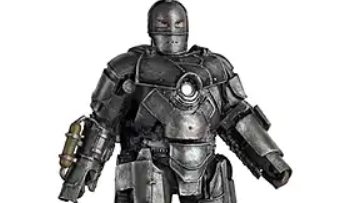

In [20]:
차종 = total["Name"].unique()

def __preprocessing(car_Name,col_Name):
    try:
        정상값 = total.loc[total["Name"]==car_Name,col_Name].value_counts().index[0]
        차종별index = total.loc[total["Name"]==car_Name,col_Name].index
        for cnt in 차종별index:
            if(pd.isnull(total.loc[cnt,col_Name])):
                total.loc[cnt,col_Name] = 정상값
    except:
        pass
col_list = ["Engine","Seats","Fuel_Type","Transmission"]
for col in tqdm_notebook(col_list):
    for car in 차종:
        __preprocessing(car,col)

In [21]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018 entries, 0 to 6017
Data columns (total 29 columns):
Engine               5954 non-null object
Fuel_Type            5992 non-null object
Kilometers_Driven    5172 non-null float64
Location             5924 non-null object
Mileage              5893 non-null object
Name                 6018 non-null object
Owner_Type           5753 non-null object
Power                5060 non-null object
Seats                5979 non-null float64
Transmission         6018 non-null int64
Year                 5661 non-null float64
cartype              6018 non-null object
LARGE_NAME           6018 non-null object
I20                  6018 non-null int64
CITY                 6018 non-null int64
CLASS                6018 non-null int64
BMW_X                6018 non-null int64
POLO                 6018 non-null int64
SERIES               6018 non-null int64
CRUZE                6018 non-null int64
XCENT                6018 non-null int64
I10              

In [22]:
total.loc[total["Name"]==차종[1]]

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,Owner_Type,Power,Seats,Transmission,...,CRUZE,XCENT,I10,AUDI_A,D320D,Brand,Nationality,Nationality2,Loc_mean_price,Location2
1,1497,Petrol,22974.0,Kochi,18.0,Honda City i-VTEC CVT VX,First,NaN,5.0,0,...,0,0,0,0,0,Honda,Japan,Japan,11.244981,Delhi
1407,1497,Petrol,18955.0,Bangalore,NaN,Honda City i-VTEC CVT VX,First,117.3,5.0,0,...,0,0,0,0,0,Honda,Japan,Japan,13.700521,Coimbatore
2069,1497,Petrol,35000.0,Jaipur,18.0,Honda City i-VTEC CVT VX,First,NaN,5.0,0,...,0,0,0,0,0,Honda,Japan,Japan,5.760122,Pune
2720,1497,Petrol,NaN,Mumbai,18.0,Honda City i-VTEC CVT VX,First,117.3,5.0,0,...,0,0,0,0,0,Honda,Japan,Japan,9.584833,Ahmedabad
3877,1497,Petrol,4500.0,Pune,18.0,Honda City i-VTEC CVT VX,First,117.3,5.0,0,...,0,0,0,0,0,Honda,Japan,Japan,6.589785,Pune
4633,1497,Petrol,30000.0,Mumbai,18.0,Honda City i-VTEC CVT VX,First,117.3,5.0,0,...,0,0,0,0,0,Honda,Japan,Japan,9.584833,Ahmedabad


In [23]:
total.loc[total["Name"]==차종[1],"Power"]

1         NaN
1407    117.3
2069      NaN
2720    117.3
3877    117.3
4633    117.3
Name: Power, dtype: object

# 9. 위 방법으로 해결되지 않는 부분 해결

In [24]:
total["Engine"].fillna(-1,inplace=True)
total["Mileage"].fillna(-1,inplace=True)
total["Power"].fillna(-1,inplace=True)

In [25]:
total["Engine"] = total["Engine"].astype("float64")
total["Mileage"] = total["Mileage"].astype("float64")
total["Power"] = total["Power"].astype("float64")

In [26]:
차종 = total["Name"].unique()
def power_preprocessing(car_Name):
    파워가결측인인덱스 = total.loc[total["Power"]==-1].loc[total.loc[total["Power"]==-1]["Name"]==car_Name,:].index
    for idx in 파워가결측인인덱스:
        결측인친구의마일리지값 = total.loc[idx,"Mileage"]
        동일마일리지df = total.loc[total["Mileage"]==결측인친구의마일리지값]
        채울값 = 동일마일리지df.loc[동일마일리지df["Name"]==car_Name,"Power"].mode()[0]
        total.loc[idx,"Power"] = 채울값
for car in tqdm_notebook(차종):
    power_preprocessing(car)

In [27]:
차종 = total["Name"].unique()
def Mile_preprocessing(car_Name):
    마일리지가결측인인덱스 = total.loc[total["Mileage"]==-1].loc[total.loc[total["Mileage"]==-1]["Name"]==car_Name,:].index
    for idx in 마일리지가결측인인덱스:
        결측인친구의마일리지리지값 = total.loc[idx,"Power"]
        동일마일리지리지df = total.loc[total["Power"]==결측인친구의마일리지리지값]
        채울값 = 동일마일리지리지df.loc[동일마일리지리지df["Name"]==car_Name,"Mileage"].mode()[0]
        total.loc[idx,"Mileage"] = 채울값
for car in tqdm_notebook(차종):
    Mile_preprocessing(car)

In [28]:
total.loc[total["Power"]==-1].loc[total.loc[total["Power"]==-1]["Mileage"]==-1].index

Int64Index([ 394,  551,  658,  769,  797,  884, 1595, 1713, 1899, 1905, 2095,
            2101, 2270, 2296, 2335, 2403, 2936, 2996, 3111, 3336, 3419, 3421,
            3503, 3698, 3900, 3957, 4098, 4110, 4187, 4239, 4568, 5141, 5252,
            5297, 5419, 5420, 5473],
           dtype='int64')

# 10. 파워 엔진 둘 다 결측인 경우 드랍 ( TR만 )

In [29]:
둘다결측인거=np.array(list(total.loc[total["Power"]==-1].loc[total.loc[total["Power"]==-1]["Mileage"]==-1].index))
둘다결측인거 = 둘다결측인거[둘다결측인거<5000]
for i in 둘다결측인거:
    total.drop(i,inplace=True) 
    price.drop(i,inplace=True)
    
total.drop(497,inplace=True)
price.drop(497,inplace=True)
엔진파워결측=np.array(list(total.loc[total["Engine"]==-1].loc[total.loc[total["Engine"]==-1]["Power"]==-1].index))
엔진파워결측 = 엔진파워결측[엔진파워결측<5000]

for i in 엔진파워결측:
    total.drop(i,inplace=True) 
    price.drop(i,inplace=True)

#### 할 일 : KM, Loc, Owner, Year
#### 2 : Engine, Mile, Power -1인 값을 채워야함

In [30]:
total["Fuel_Type"].fillna("Petrol",inplace=True)
total["Location"].fillna("Delhi",inplace=True)
total["Owner_Type"].fillna("First",inplace=True)
total["Seats"].fillna(5,inplace=True)

# 11. 연도가 결측인 경우 같은 차종의 최빈 값으로 처리

In [31]:
for car in 차종:
    __preprocessing(car,"Year")

In [32]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968 entries, 0 to 6017
Data columns (total 29 columns):
Engine               5968 non-null float64
Fuel_Type            5968 non-null object
Kilometers_Driven    5126 non-null float64
Location             5968 non-null object
Mileage              5968 non-null float64
Name                 5968 non-null object
Owner_Type           5968 non-null object
Power                5968 non-null float64
Seats                5968 non-null float64
Transmission         5968 non-null int64
Year                 5920 non-null float64
cartype              5968 non-null object
LARGE_NAME           5968 non-null object
I20                  5968 non-null int64
CITY                 5968 non-null int64
CLASS                5968 non-null int64
BMW_X                5968 non-null int64
POLO                 5968 non-null int64
SERIES               5968 non-null int64
CRUZE                5968 non-null int64
XCENT                5968 non-null int64
I10           

In [33]:
total.loc[total["Mileage"]==-1,"Mileage"]

138    -1.0
312    -1.0
456    -1.0
457    -1.0
477    -1.0
637    -1.0
888    -1.0
968    -1.0
1051   -1.0
1091   -1.0
1467   -1.0
1529   -1.0
1626   -1.0
2058   -1.0
2258   -1.0
2485   -1.0
2518   -1.0
2656   -1.0
2725   -1.0
2835   -1.0
2943   -1.0
2946   -1.0
3008   -1.0
3022   -1.0
3124   -1.0
3132   -1.0
3183   -1.0
3265   -1.0
3374   -1.0
3431   -1.0
3486   -1.0
3561   -1.0
3690   -1.0
3757   -1.0
3798   -1.0
4019   -1.0
4245   -1.0
4304   -1.0
4418   -1.0
5141   -1.0
5228   -1.0
5252   -1.0
5297   -1.0
5419   -1.0
5420   -1.0
5473   -1.0
5588   -1.0
5635   -1.0
5713   -1.0
5753   -1.0
5843   -1.0
5971   -1.0
Name: Mileage, dtype: float64

In [34]:
total["Year"].fillna(2015,inplace=True)
total.loc[total["Mileage"]==-1,"Mileage"] = 18
total.loc[total["Power"]==-1,"Power"] = 107
total.loc[total["Engine"]==-1,"Engine"] = 1618

In [35]:
total.loc[total["Mileage"]==-1,"Mileage"]

Series([], Name: Mileage, dtype: float64)

# 12. KM 이상치 처리

In [36]:
total.loc[total["Kilometers_Driven"]==6500000,"Kilometers_Driven"] = 65000

# 13. Year 칼럼으로 파생변수 생성 ( cat 형식 ) 

In [37]:
happy_new_year = pd.get_dummies(total["Year"],prefix="Year")
happy_new_year["before_2006"] = 0
for y in range(total.index.max()):
    try:
        happy_new_year.loc[y,"before_2006"] = happy_new_year.loc[y,"Year_1998.0"] + happy_new_year.loc[y,"Year_1999.0"] +\
                                            happy_new_year.loc[y,"Year_2000.0"] + happy_new_year.loc[y,"Year_2001.0"] +\
                                            happy_new_year.loc[y,"Year_2002.0"] +happy_new_year.loc[y,"Year_2003.0"] +\
                                            happy_new_year.loc[y,"Year_2004.0"] +happy_new_year.loc[y,"Year_2005.0"]
    except:
        print(y,"는 삭제된 index 이다.ㅎ")
        pass

323 는 삭제된 index 이다.ㅎ
394 는 삭제된 index 이다.ㅎ
448 는 삭제된 index 이다.ㅎ
497 는 삭제된 index 이다.ㅎ
551 는 삭제된 index 이다.ㅎ
658 는 삭제된 index 이다.ㅎ
769 는 삭제된 index 이다.ㅎ
797 는 삭제된 index 이다.ㅎ
816 는 삭제된 index 이다.ㅎ
852 는 삭제된 index 이다.ㅎ
884 는 삭제된 index 이다.ㅎ
1230 는 삭제된 index 이다.ㅎ
1323 는 삭제된 index 이다.ㅎ
1469 는 삭제된 index 이다.ㅎ
1476 는 삭제된 index 이다.ㅎ
1586 는 삭제된 index 이다.ㅎ
1595 는 삭제된 index 이다.ㅎ
1713 는 삭제된 index 이다.ㅎ
1722 는 삭제된 index 이다.ㅎ
1771 는 삭제된 index 이다.ㅎ
1899 는 삭제된 index 이다.ㅎ
1905 는 삭제된 index 이다.ㅎ
1922 는 삭제된 index 이다.ㅎ
2095 는 삭제된 index 이다.ㅎ
2101 는 삭제된 index 이다.ㅎ
2270 는 삭제된 index 이다.ㅎ
2296 는 삭제된 index 이다.ㅎ
2335 는 삭제된 index 이다.ㅎ
2377 는 삭제된 index 이다.ㅎ
2403 는 삭제된 index 이다.ㅎ
2936 는 삭제된 index 이다.ㅎ
2996 는 삭제된 index 이다.ㅎ
3111 는 삭제된 index 이다.ㅎ
3336 는 삭제된 index 이다.ㅎ
3419 는 삭제된 index 이다.ㅎ
3421 는 삭제된 index 이다.ㅎ
3503 는 삭제된 index 이다.ㅎ
3518 는 삭제된 index 이다.ㅎ
3606 는 삭제된 index 이다.ㅎ
3653 는 삭제된 index 이다.ㅎ
3698 는 삭제된 index 이다.ㅎ
3900 는 삭제된 index 이다.ㅎ
3957 는 삭제된 index 이다.ㅎ
4098 는 삭제된 index 이다.ㅎ
4110 는 삭제된 index 이다.ㅎ
4129 는 삭제된 index 이다.ㅎ

In [38]:
happy_new_year["y_1819"] = 0
for y in range(total.index.max()):
    try:
        happy_new_year.loc[y,"y_1819"] = happy_new_year.loc[y,"Year_2019.0"] + happy_new_year.loc[y,"Year_2018.0"]
    except:
        print(y,"는 삭제된 index 이다.ㅎ")
        pass
    
happy_new_year["y_1716"] = 0
for y in range(total.index.max()):
    try:
        happy_new_year.loc[y,"y_1716"] = happy_new_year.loc[y,"Year_2017.0"] + happy_new_year.loc[y,"Year_2016.0"]
    except:
        print(y,"는 삭제된 index 이다.ㅎ")
        pass
    
happy_new_year["y_1514"] = 0
for y in range(total.index.max()):
    try:
        happy_new_year.loc[y,"y_1514"] = happy_new_year.loc[y,"Year_2015.0"] + happy_new_year.loc[y,"Year_2014.0"]
    except:
        print(y,"는 삭제된 index 이다.ㅎ")
        pass
    
happy_new_year["y_1312"] = 0
for y in range(total.index.max()):
    try:
        happy_new_year.loc[y,"y_1312"] = happy_new_year.loc[y,"Year_2013.0"] + happy_new_year.loc[y,"Year_2012.0"]
    except:
        print(y,"는 삭제된 index 이다.ㅎ")
        pass
    
happy_new_year["y_1110"] = 0
for y in range(total.index.max()):
    try:
        happy_new_year.loc[y,"y_1110"] = happy_new_year.loc[y,"Year_2011.0"] + happy_new_year.loc[y,"Year_2010.0"]
    except:
        print(y,"는 삭제된 index 이다.ㅎ")
        pass

323 는 삭제된 index 이다.ㅎ
394 는 삭제된 index 이다.ㅎ
448 는 삭제된 index 이다.ㅎ
497 는 삭제된 index 이다.ㅎ
551 는 삭제된 index 이다.ㅎ
658 는 삭제된 index 이다.ㅎ
769 는 삭제된 index 이다.ㅎ
797 는 삭제된 index 이다.ㅎ
816 는 삭제된 index 이다.ㅎ
852 는 삭제된 index 이다.ㅎ
884 는 삭제된 index 이다.ㅎ
1230 는 삭제된 index 이다.ㅎ
1323 는 삭제된 index 이다.ㅎ
1469 는 삭제된 index 이다.ㅎ
1476 는 삭제된 index 이다.ㅎ
1586 는 삭제된 index 이다.ㅎ
1595 는 삭제된 index 이다.ㅎ
1713 는 삭제된 index 이다.ㅎ
1722 는 삭제된 index 이다.ㅎ
1771 는 삭제된 index 이다.ㅎ
1899 는 삭제된 index 이다.ㅎ
1905 는 삭제된 index 이다.ㅎ
1922 는 삭제된 index 이다.ㅎ
2095 는 삭제된 index 이다.ㅎ
2101 는 삭제된 index 이다.ㅎ
2270 는 삭제된 index 이다.ㅎ
2296 는 삭제된 index 이다.ㅎ
2335 는 삭제된 index 이다.ㅎ
2377 는 삭제된 index 이다.ㅎ
2403 는 삭제된 index 이다.ㅎ
2936 는 삭제된 index 이다.ㅎ
2996 는 삭제된 index 이다.ㅎ
3111 는 삭제된 index 이다.ㅎ
3336 는 삭제된 index 이다.ㅎ
3419 는 삭제된 index 이다.ㅎ
3421 는 삭제된 index 이다.ㅎ
3503 는 삭제된 index 이다.ㅎ
3518 는 삭제된 index 이다.ㅎ
3606 는 삭제된 index 이다.ㅎ
3653 는 삭제된 index 이다.ㅎ
3698 는 삭제된 index 이다.ㅎ
3900 는 삭제된 index 이다.ㅎ
3957 는 삭제된 index 이다.ㅎ
4098 는 삭제된 index 이다.ㅎ
4110 는 삭제된 index 이다.ㅎ
4129 는 삭제된 index 이다.ㅎ

In [39]:
new_total = pd.concat([total,happy_new_year],axis=1)

In [40]:
for i in tqdm_notebook(range(total.index.max())):
    try:
        if new_total.loc[i,"y_1819"] == 1:
            if (pd.isnull(new_total.loc[i,"Kilometers_Driven"])):
                new_total.loc[i,"Kilometers_Driven"] = 23000
        elif new_total.loc[i,"y_1716"] == 1:
            if (pd.isnull(new_total.loc[i,"Kilometers_Driven"])):
                new_total.loc[i,"Kilometers_Driven"] = 38800
        elif new_total.loc[i,"before_2006"] == 1:
            if (pd.isnull(new_total.loc[i,"Kilometers_Driven"])):
                new_total.loc[i,"Kilometers_Driven"] = 95000
        else:
            if (pd.isnull(new_total.loc[i,"Kilometers_Driven"])):
                new_total.loc[i,"Kilometers_Driven"] = 55000
    except:
        print(i,"는 삭제된 index")
        pass

323 는 삭제된 index
394 는 삭제된 index
448 는 삭제된 index
497 는 삭제된 index
551 는 삭제된 index
658 는 삭제된 index
769 는 삭제된 index
797 는 삭제된 index
816 는 삭제된 index
852 는 삭제된 index
884 는 삭제된 index
1230 는 삭제된 index
1323 는 삭제된 index
1469 는 삭제된 index
1476 는 삭제된 index
1586 는 삭제된 index
1595 는 삭제된 index
1713 는 삭제된 index
1722 는 삭제된 index
1771 는 삭제된 index
1899 는 삭제된 index
1905 는 삭제된 index
1922 는 삭제된 index
2095 는 삭제된 index
2101 는 삭제된 index
2270 는 삭제된 index
2296 는 삭제된 index
2335 는 삭제된 index
2377 는 삭제된 index
2403 는 삭제된 index
2936 는 삭제된 index
2996 는 삭제된 index
3111 는 삭제된 index
3336 는 삭제된 index
3419 는 삭제된 index
3421 는 삭제된 index
3503 는 삭제된 index
3518 는 삭제된 index
3606 는 삭제된 index
3653 는 삭제된 index
3698 는 삭제된 index
3900 는 삭제된 index
3957 는 삭제된 index
4098 는 삭제된 index
4110 는 삭제된 index
4129 는 삭제된 index
4187 는 삭제된 index
4239 는 삭제된 index
4568 는 삭제된 index
4857 는 삭제된 index



In [41]:
new_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968 entries, 0 to 6017
Data columns (total 57 columns):
Engine               5968 non-null float64
Fuel_Type            5968 non-null object
Kilometers_Driven    5968 non-null float64
Location             5968 non-null object
Mileage              5968 non-null float64
Name                 5968 non-null object
Owner_Type           5968 non-null object
Power                5968 non-null float64
Seats                5968 non-null float64
Transmission         5968 non-null int64
Year                 5968 non-null float64
cartype              5968 non-null object
LARGE_NAME           5968 non-null object
I20                  5968 non-null int64
CITY                 5968 non-null int64
CLASS                5968 non-null int64
BMW_X                5968 non-null int64
POLO                 5968 non-null int64
SERIES               5968 non-null int64
CRUZE                5968 non-null int64
XCENT                5968 non-null int64
I10           

--------------------------------------------------------------------------------------------------------

# 14. KM 이상치 제거

In [42]:
new_total[new_total["Kilometers_Driven"]>400000]

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,Owner_Type,Power,Seats,Transmission,...,Year_2016.0,Year_2017.0,Year_2018.0,Year_2019.0,before_2006,y_1819,y_1716,y_1514,y_1312,y_1110
212,1497.0,Petrol,480000.0,Kolkata,17.40,Honda City i VTEC SV,First,117.30,5.0,1,...,0,0,0,0,0,0,0,1,0,0
671,1968.0,Diesel,480000.0,Chennai,16.96,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,First,138.03,5.0,0,...,0,0,0,0,0,0,0,1,0,0
1884,1618.0,Diesel,775000.0,Kolkata,19.30,Skoda Octavia Ambition Plus 2.0 TDI AT,First,141.00,5.0,0,...,0,0,0,0,0,0,0,0,1,0
3927,1598.0,Diesel,720000.0,Chennai,20.54,Volkswagen Vento Diesel Highline,First,103.60,5.0,1,...,0,0,0,0,0,0,0,0,1,0
3945,1197.0,Petrol,620000.0,Chennai,20.36,Hyundai i10 Magna 1.2,First,78.90,5.0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
new_total.drop(212,inplace=True)
new_total.drop(671,inplace=True)
new_total.drop(1884,inplace=True)
new_total.drop(3927,inplace=True)
new_total.drop(3945,inplace=True)

price.drop(212,inplace=True)
price.drop(671,inplace=True)
price.drop(1884,inplace=True)
price.drop(3927,inplace=True)
price.drop(3945,inplace=True)

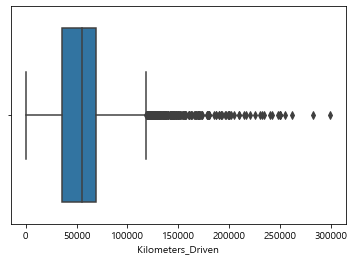

In [44]:
sns.boxplot(new_total["Kilometers_Driven"])

In [45]:
new_total["Kilometers_Driven"].describe()

count      5963.000000
mean      56009.993795
std       31896.766515
min         171.000000
25%       36000.000000
50%       55000.000000
75%       69000.000000
max      299322.000000
Name: Kilometers_Driven, dtype: float64

In [46]:
km_bin = [0,30000,60000,90000,120000,150000,200000,300000]
km_lab = ["before_30000","before_60000","before_90000","before_120000","before_150000","before_200000","before_300000"]
km_cats = pd.cut(new_total["Kilometers_Driven"],km_bin,labels=km_lab)
new_total["Km_cats"] = km_cats

In [47]:
dist_bin = [0,10000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,90000,100000,200000,800000]
lab = []
for bin in range(len(dist_bin)-1):
    lab.append(str(dist_bin[bin]))
cats = pd.cut(new_total["Kilometers_Driven"],dist_bin,labels=lab)
total["Km_cats2"] = cats

# 15. Seat 0 data drop 

In [48]:
new_total.drop(1509,inplace=True)
price.drop(1509,inplace=True)

# 16. Seat one-hot

In [49]:
new_total2 = pd.concat([new_total,pd.get_dummies(new_total["Seats"],prefix="seat")],axis=1)

# 17. Engine cats

In [50]:
e_bin = [0,500,1000,2000,3000,4000,5000,6000]
e_lab = ["e1","e2","e3","e4","e5","e6","e7"]
e_cats = pd.cut(new_total2["Engine"],e_bin,labels=e_lab)
new_total2["En_cats"] = e_cats

In [51]:
CC_bin = [-1,500,1000,1300,1600,2000,2500,3000,6000]
CC_lab = ["N","m1","m2","m3","m4","m5","m6","m7"]
CC_cats = pd.cut(new_total2["Engine"],CC_bin,labels=CC_lab)
new_total2["En_cats2"] = CC_cats

# 18. Power cats

In [52]:
p_bin = [0,50,80,120,200,300,400,561]
p_lab = ["p1","p2","p3","p4","p5","p6","p7"]
p_cats = pd.cut(new_total2["Power"],p_bin,labels=p_lab)
new_total2["P_cats"] = p_cats

# 19. Mileage cats

In [53]:
m_bin = [0,6,12,15,18,21,24,34]
m_lab = ["m1","m2","m3","m4","m5","m6","m7"]
m_cats = pd.cut(new_total2["Mileage"],m_bin,labels=m_lab)
new_total2["M_cats"] = m_cats

In [54]:
Mi_bin = [-1,11,14,16,17,19,20,23,26,35]
Mi_lab = ["N","a","b","c","d","e","f","h","i"]
Mi_cats = pd.cut(new_total2["Mileage"],Mi_bin,labels=Mi_lab)
new_total2["Mi_cats"] = Mi_cats

# 20. Year cats

In [55]:
new_total2["Age"] = 2020-new_total2["Year"]

In [56]:
AGE_bin = [0,2,3,4,5,6,8,10,15,23]
AGE_lab = ["2year","3year","4year","5year","6year","8year","10year","15year","23year",]
AGE_cats = pd.cut(new_total2["Age"],AGE_bin,labels=AGE_lab)
new_total2["AGE_cats"] = AGE_cats

# 21. Fuel_Type2

In [57]:
fuel_dic={
    'CNG':'LPG',
    'LPG':'LPG',
    'Diesel':'Diesel',
    'Petrol':'Petrol'   
}
new_total2["Fuel_Type2"] = new_total2["Fuel_Type"].map(fuel_dic)

In [58]:
new_total2["Loc_mean_price"].fillna(new_total2["Loc_mean_price"].mean(),inplace=True)

In [59]:
save_data = new_total2.copy()
#del save_data["Name"],save_data["LARGE_NAME"]
덤 = pd.get_dummies(save_data)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(덤)
scaled_data = pd.DataFrame(scaled_data,columns=덤.columns)

In [60]:
tr = scaled_data.iloc[:-1019,:]
te = scaled_data.iloc[-1019:,:]
X_tr, X_te, y_tr, y_te = train_test_split(tr,price,random_state=1910,test_size=0.3)

# Modeling using MLP

In [61]:
from sklearn.neural_network import MLPRegressor

In [63]:
model = MLPRegressor(
    hidden_layer_sizes=(1024,512,256,128,64,32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=1000,
    shuffle=True,
    random_state=2000,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
).fit(tr,price)

Iteration 1, loss = 61.05924077
Iteration 2, loss = 15.62360994
Iteration 3, loss = 6.66226148
Iteration 4, loss = 4.41361491
Iteration 5, loss = 3.01087311
Iteration 6, loss = 2.21609132
Iteration 7, loss = 1.65370330
Iteration 8, loss = 1.25894944
Iteration 9, loss = 1.06974327
Iteration 10, loss = 0.99411864
Iteration 11, loss = 0.78165823
Iteration 12, loss = 0.67943153
Iteration 13, loss = 0.56341435
Iteration 14, loss = 0.46713327
Iteration 15, loss = 0.36538951
Iteration 16, loss = 0.31315004
Iteration 17, loss = 0.25684259
Iteration 18, loss = 0.21152213
Iteration 19, loss = 0.20945007
Iteration 20, loss = 0.17284766
Iteration 21, loss = 0.16380220
Iteration 22, loss = 0.15876612
Iteration 23, loss = 0.17573231
Iteration 24, loss = 0.20485838
Iteration 25, loss = 0.19572691
Iteration 26, loss = 0.18121034
Iteration 27, loss = 0.15421844
Iteration 28, loss = 0.15149583
Iteration 29, loss = 0.16886045
Iteration 30, loss = 0.19913168
Iteration 31, loss = 0.21110662
Iteration 32, l

In [64]:
sub = pd.read_csv("../data/sampleSubmission.csv",index_col="ID")
sub["Price"] = model.predict(te)
sub.to_csv("../sub/no_usa_sky.csv")

In [67]:
new_p = pd.concat([price,sub["Price"]])
new_p.reset_index(drop=True)

0        1.450000
1       11.970000
2        2.640000
3        6.950000
4       15.250000
          ...    
5957     6.475801
5958     7.954255
5959     6.017998
5960     6.329515
5961     3.443946
Name: Price, Length: 5962, dtype: float64

In [65]:
model = MLPRegressor(
    hidden_layer_sizes=(1024,1024,512,256,128,64,32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=1000,
    shuffle=True,
    random_state=2000,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
).fit(tr,price)

Iteration 1, loss = 51.61211694
Iteration 2, loss = 10.78058887
Iteration 3, loss = 4.70612359
Iteration 4, loss = 4.49881767
Iteration 5, loss = 2.47242683
Iteration 6, loss = 1.54914939
Iteration 7, loss = 1.11877628
Iteration 8, loss = 1.05260401
Iteration 9, loss = 0.90481053
Iteration 10, loss = 0.99553067
Iteration 11, loss = 0.79057095
Iteration 12, loss = 0.65652037
Iteration 13, loss = 0.45087838
Iteration 14, loss = 0.43578357
Iteration 15, loss = 0.40146584
Iteration 16, loss = 0.33131037
Iteration 17, loss = 0.29518006
Iteration 18, loss = 0.30826696
Iteration 19, loss = 0.28078202
Iteration 20, loss = 0.40943199
Iteration 21, loss = 0.46506556
Iteration 22, loss = 0.41079558
Iteration 23, loss = 0.45102345
Iteration 24, loss = 0.32789247
Iteration 25, loss = 0.41758037
Iteration 26, loss = 0.37809283
Iteration 27, loss = 0.36861680
Iteration 28, loss = 0.36405593
Iteration 29, loss = 0.25227068
Iteration 30, loss = 0.18846871
Iteration 31, loss = 0.17255713
Iteration 32, l

In [66]:
sub = pd.read_csv("../data/sampleSubmission.csv",index_col="ID")
sub["Price"] = model.predict(te)
sub.to_csv("../sub/no_usa_sky2.csv")